In [52]:
import sys
sys.path.insert(0, "/Users/rstiskalek/Projects/candel")

import numpy as np
import matplotlib.pyplot as plt
import scienceplots

import candel
from candel import SPEED_OF_LIGHT

from utils import *

from scipy.stats import norm
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [44]:
config_path = "/Users/rstiskalek/Projects/CANDEL/scripts/runs/config_shoes.toml"
data = candel.pvdata.load_SH0ES_from_config(config_path)

2025-06-11 14:04:48 warning: zero width found in the priors. Setting it to 1e-5.
2025-06-11 14:04:48 indices of zero width: [44]
2025-06-11 14:04:48 found zero-width prior at index 44. Setting it to 0.


In [60]:
root = "/Users/rstiskalek/Projects/CANDEL/results/SH0ES"

samples_fiducial = read_all_samples(root, "SH0ES_fiducial.hdf5")
samples_Cepheids_only = read_all_samples(root, "Cepheid_distances_no_redshift.hdf5")

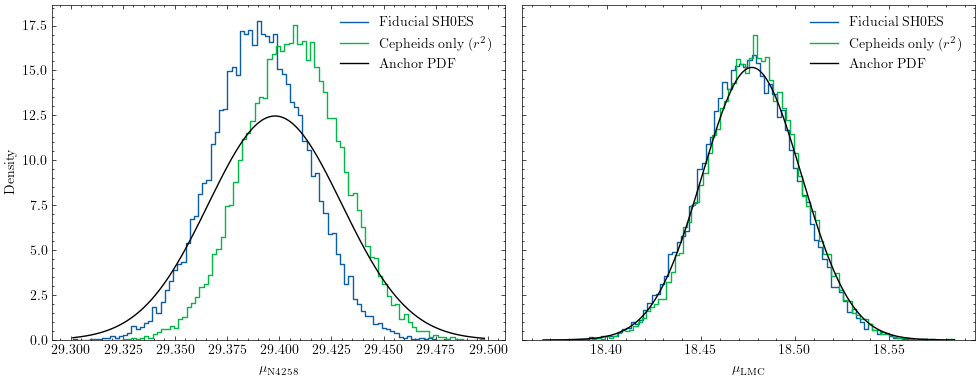

In [82]:
with plt.style.context("science"):
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

    # --- Panel 1: N4258 ---
    ax = axes[0]
    sns.histplot(samples_fiducial["mu_N4258"], bins="auto", stat="density", element="step", fill=False, label="Fiducial SH0ES", ax=ax)
    sns.histplot(samples_Cepheids_only["mu_N4258"], bins="auto", stat="density", element="step", fill=False, label=r"Cepheids only ($r^2$)", ax=ax)

    x_min = min(samples_fiducial["mu_N4258"].min(), samples_Cepheids_only["mu_N4258"].min())
    x_max = max(samples_fiducial["mu_N4258"].max(), samples_Cepheids_only["mu_N4258"].max())
    x = np.linspace(x_min, x_max, 500)

    pdf_anchor = norm.pdf(x, loc=data["mu_N4258_anchor"], scale=data["e_mu_N4258_anchor"])
    ax.plot(x, pdf_anchor, label="Anchor PDF", color="k")

    ax.set_xlabel(r"$\mu_{\mathrm{N4258}}$")
    ax.set_ylabel("Density")
    ax.legend()

    # --- Panel 2: LMC ---
    ax = axes[1]

    sns.histplot(samples_fiducial["mu_LMC"], bins="auto", stat="density", element="step", fill=False, label="Fiducial SH0ES", ax=ax)
    sns.histplot(samples_Cepheids_only["mu_LMC"], bins="auto", stat="density", element="step", fill=False, label=r"Cepheids only ($r^2$)", ax=ax)

    x_min = min(samples_fiducial["mu_LMC"].min(), samples_Cepheids_only["mu_LMC"].min())
    x_max = max(samples_fiducial["mu_LMC"].max(), samples_Cepheids_only["mu_LMC"].max())
    x = np.linspace(x_min, x_max, 500)

    pdf_anchor = norm.pdf(x, loc=data["mu_LMC_anchor"], scale=data["e_mu_LMC_anchor"])
    ax.plot(x, pdf_anchor, label="Anchor PDF", color="k")

    ax.set_xlabel(r"$\mu_{\mathrm{LMC}}$")
    ax.legend()

    plt.tight_layout()
    plt.savefig("/Users/rstiskalek/Downloads/anchors.png", dpi=450)
    plt.show()

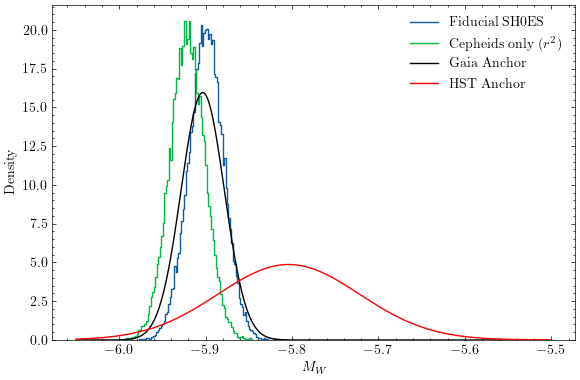

In [83]:
with plt.style.context("science"):
    plt.figure(figsize=(6, 4))

    # Plot the fiducial samples as histogram
    sns.histplot(samples_fiducial["M_W"], bins="auto", stat="density", element="step", fill=False, label="Fiducial SH0ES", color="C0")
    sns.histplot(samples_Cepheids_only["M_W"], bins="auto", stat="density", element="step", fill=False, label=r"Cepheids only ($r^2$)", color="C1")

    # Determine x range
    x = np.linspace(-6.05, -5.5, 500)

    # Plot Gaia anchor
    pdf_gaia = norm.pdf(x, loc=data["M_Gaia"], scale=data["e_M_Gaia"])
    plt.plot(x, pdf_gaia, label="Gaia Anchor", color="k", )

    # Plot HST anchor
    pdf_hst = norm.pdf(x, loc=data["M_HST"], scale=data["e_M_HST"])
    plt.plot(x, pdf_hst, label="HST Anchor", color="red", )

    plt.xlabel(r"$M_W$")
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.savefig("/Users/rstiskalek/Downloads/M_W.png")
    plt.show()

### Comparison of distances

<unknown>:286: SyntaxWarning: invalid escape sequence '\m'
<unknown>:286: SyntaxWarning: invalid escape sequence '\m'


SH0ES_fiducial.hdf5: H0, M_B, M_W, Z_W, b_W, dZP, mu_LMC, mu_M31, mu_N4258, mu_host
Cepheid_distances_no_redshift.hdf5: M_W, Z_W, b_W, dZP, mu_LMC, mu_M31, mu_N4258, mu_host
Cepheid_distances_no_redshift_uniform_mu.hdf5: M_W, Z_W, b_W, dZP, mu_LMC, mu_M31, mu_N4258, mu_host
Cepheid_distances_redshift_r2_PVcov.hdf5: H0, M_W, Z_W, b_W, dZP, mu_LMC, mu_M31, mu_N4258, mu_host, sigma_v
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
2025-06-11 14:33:42 [INFO] Saving GetDist triangle plot to: /Users/rstiskalek/Downloads/SH0ES_distances.png


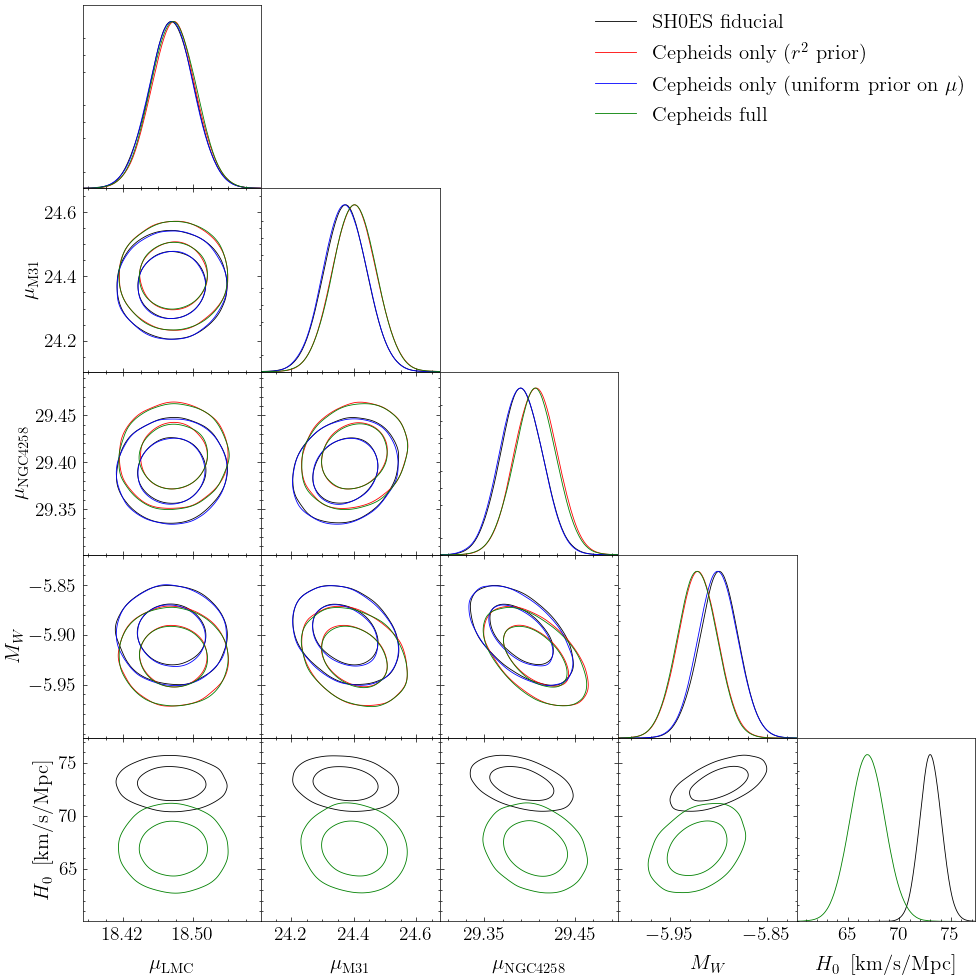

In [90]:
fnames = [
    "SH0ES_fiducial.hdf5",
    "Cepheid_distances_no_redshift.hdf5",
    "Cepheid_distances_no_redshift_uniform_mu.hdf5",
    "Cepheid_distances_redshift_r2_PVcov.hdf5",
]
labels = [
    "SH0ES fiducial",
    r"Cepheids only ($r^2$ prior)",
    r"Cepheids only (uniform prior on $\mu$)",
    r"Cepheids full",
]

fnames = [join(root, fname) for fname in fnames]


candel.plot_corner_from_hdf5(
    fnames,
    keys=["mu_LMC", "mu_M31", "mu_N4258", "M_W", "H0"],
    labels=labels,
    filled=False,
    fontsize=18,
    filename="/Users/rstiskalek/Downloads/SH0ES_distances.png",
    )